## Кодування та компресія

## Завдання:

1.	Напишіть код для стиснення зображення з використанням алгоритму **JPEG.**
2.	Використовуючи бібліотеку **gzip**, напишіть код для стиснення текстового файлу.
3.	Реалізуйте алгоритм **Хаффмана** для стиснення текстових даних. Напишіть код для стиснення та розпакування текстового файлу за допомогою цього алгоритму.

## Розв'язок

In [3]:
import numpy as np
import cv2
import os
from PIL import Image
from matplotlib import pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

### 1.	Стиснення зображення з використанням алгоритму JPEG

Розмір файлу: 7015778 байт
Розмір зображення: (4128, 3096)


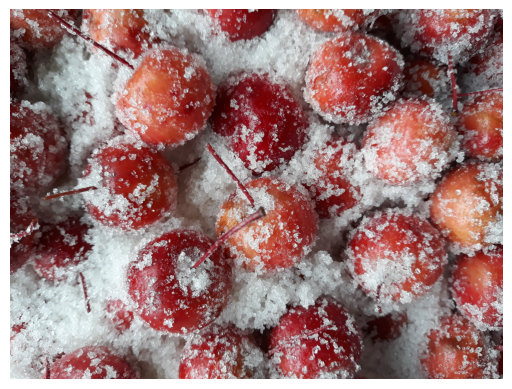

In [18]:
# Відкриття зображення
image = Image.open('apples_in_sugar.jpg')
print(f"Розмір файлу: {os.path.getsize('apples_in_sugar.jpg')} байт")
print(f"Розмір зображення: {image.size}")
plt.axis('off')
plt.imshow(image);

In [19]:
# Збереження зображення у форматі JPEG з певними параметрами стиснення

image.save('compressed_apples.jpg', format='JPEG', quality=20, optimize=True)

# Параметр quality визначає якість стиснення від 0 (максимально стиснене) до 100 (максимально якісне), 
# і параметр optimize вказує, чи потрібно використовувати оптимізацію при стисненні.

Розмір файлу: 707296 байт
Розмір зображення: (4128, 3096)


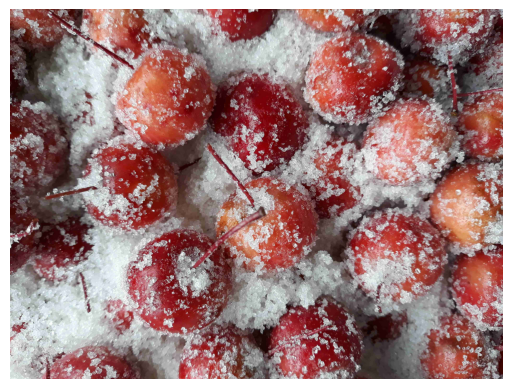

In [20]:
# Виводимо стиснене зображення
img = Image.open('compressed_apples.jpg')
print(f"Розмір файлу: {os.path.getsize('compressed_apples.jpg')} байт")
print(f"Розмір зображення: {img.size}")
plt.axis('off')
plt.imshow(img);

### 2.	 Стиснення текстового файлу з використанням бібліотеки gzip

In [32]:
import gzip

In [33]:
# Відкриваємо файл, який ми хочемо стиснути, для читання в текстовому режимі
with open('paradise_apple_jelly.txt', 'rt') as file_in:
    # Відкриваємо файл, у який буде записано стиснутий текст
    with gzip.open('compressed_recipe.gz', 'wt') as file_out:
        # Стиснутий текст буде записуватися в файл 'compressed_recipe.gz'
        file_out.writelines(file_in)

print('File compression complete.')

File compression complete.


In [34]:
print(f"Розмір початкового файлу: {os.path.getsize('paradise_apple_jelly.txt')} байт")
print(f"Розмір стисненого файлу: {os.path.getsize('compressed_recipe.gz')} байт")

Розмір початкового файлу: 504 байт
Розмір стисненого файлу: 344 байт


### 3. Стиснення та розпакування текстового файлу за допомогою алгоритму Хаффмана

In [35]:
# Node of a Huffman Tree  
class Nodes:  
    def __init__(self, probability, symbol, left = None, right = None):  
        # probability of the symbol  
        self.probability = probability  
  
        # the symbol  
        self.symbol = symbol  
  
        # the left node  
        self.left = left  
  
        # the right node  
        self.right = right  
  
        # the tree direction (0 or 1)  
        self.code = ''  
  
""" A supporting function in order to calculate the probabilities of symbols in specified data """  
def CalculateProbability(the_data):  
    the_symbols = dict()  
    for item in the_data:  
        if the_symbols.get(item) == None:  
            the_symbols[item] = 1  
        else:   
            the_symbols[item] += 1       
    return the_symbols  
  
""" A supporting function in order to print the codes of symbols by travelling a Huffman Tree """  
the_codes = dict()  
  
def CalculateCodes(node, value = ''):  
    # a huffman code for current node  
    newValue = value + str(node.code)  
  
    if(node.left):  
        CalculateCodes(node.left, newValue)  
    if(node.right):  
        CalculateCodes(node.right, newValue)  
  
    if(not node.left and not node.right):  
        the_codes[node.symbol] = newValue  
           
    return the_codes  
  
""" A supporting function in order to get the encoded result """  
def OutputEncoded(the_data, coding):  
    encodingOutput = []  
    for element in the_data:  
        # print(coding[element], end = '')  
        encodingOutput.append(coding[element])  
          
    the_string = ''.join([str(item) for item in encodingOutput])      
    return the_string  
          
""" A supporting function in order to calculate the space difference between compressed and non compressed data"""      
def TotalGain(the_data, coding):  
    # total bit space to store the data before compression  
    beforeCompression = len(the_data) * 8  
    afterCompression = 0  
    the_symbols = coding.keys()  
    for symbol in the_symbols:  
        the_count = the_data.count(symbol)  
        # calculating how many bit is required for that symbol in total  
        afterCompression += the_count * len(coding[symbol])  
    print("Space usage before compression (in bits):", beforeCompression)  
    print("Space usage after compression (in bits):",  afterCompression)  
  
def HuffmanEncoding(the_data):  
    symbolWithProbs = CalculateProbability(the_data)  
    the_symbols = symbolWithProbs.keys()  
    the_probabilities = symbolWithProbs.values()  
    print("symbols: ", the_symbols)  
    print("probabilities: ", the_probabilities)  
      
    the_nodes = []  
      
    # converting symbols and probabilities into huffman tree nodes  
    for symbol in the_symbols:  
        the_nodes.append(Nodes(symbolWithProbs.get(symbol), symbol))  
      
    while len(the_nodes) > 1:  
        # sorting all the nodes in ascending order based on their probability  
        the_nodes = sorted(the_nodes, key = lambda x: x.probability)  
        # for node in nodes:    
        #      print(node.symbol, node.prob)  
      
        # picking two smallest nodes  
        right = the_nodes[0]  
        left = the_nodes[1]  
      
        left.code = 0  
        right.code = 1  
      
        # combining the 2 smallest nodes to create new node  
        newNode = Nodes(left.probability + right.probability, left.symbol + right.symbol, left, right)  
      
        the_nodes.remove(left)  
        the_nodes.remove(right)  
        the_nodes.append(newNode)  
              
    huffmanEncoding = CalculateCodes(the_nodes[0])  
    print("symbols with codes", huffmanEncoding)  
    TotalGain(the_data, huffmanEncoding)  
    encodedOutput = OutputEncoded(the_data,huffmanEncoding)  
    return encodedOutput, the_nodes[0]  
   
def HuffmanDecoding(encodedData, huffmanTree):  
    treeHead = huffmanTree  
    decodedOutput = []  
    for x in encodedData:  
        if x == '1':  
            huffmanTree = huffmanTree.right     
        elif x == '0':  
            huffmanTree = huffmanTree.left  
        try:  
            if huffmanTree.left.symbol == None and huffmanTree.right.symbol == None:  
                pass  
        except AttributeError:  
            decodedOutput.append(huffmanTree.symbol)  
            huffmanTree = treeHead  
          
    string = ''.join([str(item) for item in decodedOutput])  
    return string  

#### Перевіримо процес кодування/декодування на простому тексті

In [44]:
the_data = "We will win!"  
print(the_data)  
encoding, the_tree = HuffmanEncoding(the_data)  
print('Encoded output: ', encoding)  
print('Decoded Output: ', HuffmanDecoding(encoding, the_tree))  

We will win!
symbols:  dict_keys(['W', 'e', ' ', 'w', 'i', 'l', 'n', '!'])
probabilities:  dict_values([1, 1, 2, 2, 2, 2, 1, 1])
symbols with codes {'E': '00', 'A': '01101011', 'C': '10', 'D': '110', 'B': '01101101', 'o': '00000', 'p': '000010', 'S': '00001100', 'v': '000011010', '-': '000011011', 'b': '0000111', 'm': '0001000', 'c': '0001001', '.': '000101', 'd': '000110', 'f': '0001110', '0': '000111100', '2': '000111101', 'F': '000111110', 'W': '111', ' ': '011', 't': '0100', 'u': '010100', 'M': '010101000', ':': '010101001', 'I': '010101010', 'J': '010101011', ')': '01010110', '(': '01010111', 'g': '01011', 'h': '01100', 'K': '01101000', '5': '01101001', '3': '01101010', 'P': '01101100', 'j': '0110111', 'a': '0111', 'l': '000', '\n': '10010', 'w': '010', 'y': '100111', 's': '1010', 'r': '1011', 'n': '101', 'i': '001', 'e': '110', '!': '100'}
Space usage before compression (in bits): 96
Space usage after compression (in bits): 36
Encoded output:  111110011010001000000011010001101100

#### Застосуємо цей алгоритм до данних з текстового файлу

In [37]:
file = 'paradise_apple_jelly.txt'
with open(file, 'rt') as file_in:
     text = file_in.read()
     text = text.rstrip()

In [38]:
# Дані з текстового файлу
text

'Paradise Apple Jelly\n\nIngredients:\n\n3.5 Kg apples (weight for other ingredients)\n\n3.5 Kg of confiture sugar (same weight as apples)\n\nMethod\n\nWash and trim the apples. Fortunately there is no need to peel or core these. \nPlace in a large pan with the sugar and bring slowly to the boil. \nStew for 20 minutes until soft. Strain through a jelly-bag removing any scum. \nBring to the boil and boil until a little sets when tested. Store in glass jars in a cool larder. \nApple jelly testes great.'

In [39]:
# Проводимо кодування тексту
encoding, the_tree = HuffmanEncoding(text) 

symbols:  dict_keys(['P', 'a', 'r', 'd', 'i', 's', 'e', ' ', 'A', 'p', 'l', 'J', 'y', '\n', 'I', 'n', 'g', 't', ':', '3', '.', '5', 'K', '(', 'w', 'h', 'f', 'o', ')', 'c', 'u', 'm', 'M', 'W', 'F', 'b', 'S', '2', '0', 'j', '-', 'v', 'B'])
probabilities:  dict_values([2, 28, 25, 10, 24, 25, 48, 81, 2, 12, 27, 1, 6, 14, 1, 24, 16, 36, 1, 2, 10, 2, 2, 2, 6, 15, 5, 23, 2, 5, 9, 5, 1, 1, 1, 5, 3, 1, 1, 3, 1, 1, 1])
symbols with codes {'E': '00', 'A': '01101011', 'C': '10', 'D': '110', 'B': '01101101', 'o': '00000', 'p': '000010', 'S': '00001100', 'v': '000011010', '-': '000011011', 'b': '0000111', 'm': '0001000', 'c': '0001001', '.': '000101', 'd': '000110', 'f': '0001110', '0': '000111100', '2': '000111101', 'F': '000111110', 'W': '000111111', ' ': '001', 't': '0100', 'u': '010100', 'M': '010101000', ':': '010101001', 'I': '010101010', 'J': '010101011', ')': '01010110', '(': '01010111', 'g': '01011', 'h': '01100', 'K': '01101000', '5': '01101001', '3': '01101010', 'P': '01101100', 'j': '011

In [40]:
# Закодовані данні
encoding

'011011000111101101110001101101101011100101101011000010000010100011100101010101111110001000100111100101001001010101011000101110111110001101101111110001001010010101001100101001001101010000101011010010010110100001011001011100001000001010001111010001010101111001101111101010110110001000010001110000001011001000000100011001111011001110111000101110111110001101101111110001001010010101101001010010011010100001010110100100101101000010110010000000011100010001001000001100000111011010100010100101111100110100101000101101111011001010101111010011100010001110011001101111101010110110001000010111101000101110000100000101000111101001010110100101001001010100011101000110000000000110100101001000011111101111010011000010111110000011000101001011110100010000010100011001110010111000010000010100011110100001010010001111100000010110100010100110001110100111100010011100101000110011110111110011101101000111000000000111001111110001100010100000000010000101111111000001000001011001000100100000101111100101000110011110101110001

In [41]:
# Зберігаємо закодовані дані в файл
filename, file_extension = os.path.splitext(file)
output_path = filename + "_compressed" + ".bin"
with open(output_path, 'w') as output:
    output.write(encoding)

In [42]:
# Зчитуємо дані із закодованого файлу та декодуємо їх
with open(output_path, 'rt') as file_in:
     text = file_in.read()
     text = text.rstrip()
     text = HuffmanDecoding(text, the_tree)
text

'Paradise Apple Jelly\n\nIngredients:\n\n3.5 Kg apples (weight for other ingredients)\n\n3.5 Kg of confiture sugar (same weight as apples)\n\nMethod\n\nWash and trim the apples. Fortunately there is no need to peel or core these. \nPlace in a large pan with the sugar and bring slowly to the boil. \nStew for 20 minutes until soft. Strain through a jelly-bag removing any scum. \nBring to the boil and boil until a little sets when tested. Store in glass jars in a cool larder. \nApple jelly testes great.'

## Висновок

Стиснення зображень здається більш зрозумілим, ніж стиснення тексту.

Код для стиснення та розпакування текстового файлу за допомогою алгоритму Хаффмана знайшла в джерелах до лекції і, чесно кажучи, дуже зраділа, що вийшов вдалий результат.